## 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 주식예측, 질병진단, 얼굴식별야에서 응용 : 글씨인식, 문장분류, 주식예측, 질병진단, 얼굴식별, etc...

- 지도학습(회귀, 분류) vs 비지도학습(군집) vs 강화학습(게임)

- 1. 데이터 확보 및 생성(inputdata, outputdata)
- 2. 데이터 전처리 (결측치, 훈련데이터셋과 검증데이터셋, 시험데이터셋으로 분류....)
- 3. 모델 구성
- 4. 모델 학습 과정 설정 (손실함수, 옵티마이저, 평가지표)
- 5. 모델 학습시키기
- 6. 모델 평가(시험데이터셋으로)
- 7. 모델 사용(모델 저장 후, 저장된 모델을 이용하여, 입력값이 주어지면 예측값 받기)

# 1. 데이터 셋 생성
# 2. 데이터 전처리

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input # 모델에 레이어 추가시

In [2]:
# 학습데이터 == 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
X_val = np.array([1,2,3,4,5,6,7,8,9])
Y_val = np.array([2,4,6,8,10,12,14,16,18])

In [3]:
# 분류분석을 위한 인코딩 종류
data = np.array(['a','b','b','b','c'])
print('1. 원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('2. 라벨인코딩된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('3. 원핫인코딩된 데이터 :\n', one_hot_encoding_data)

1. 원 데이터 : ['a' 'b' 'b' 'b' 'c']
2. 라벨인코딩된 데이터 : [0 1 1 1 2]
3. 원핫인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [4]:
# 분류분석을 위한 원핫인코딩 방법
data = np.array([1,2,2,4,2])
print('원 데이터 :', data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원 핫 인코딩\n', categorical_one_hot)
import pandas as pd
display('get_dummies를 이용한 원핫인코딩(데이터프레임)', pd.get_dummies(data))

원 데이터 : [1 2 2 4 2]
to_categorical을 이용한 원 핫 인코딩
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dummies를 이용한 원핫인코딩(데이터프레임)'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [5]:
y_train[:2]

array([2, 4])

In [6]:
# 분류분석을 위해 종속변수(target변수)를 원핫인코딩
y_train = to_categorical(y_train,19)
Y_val = to_categorical(Y_val)

In [7]:
y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [8]:
x_train.shape, y_train.shape

((90,), (90, 19))

In [9]:
x_train[:2]

array([1, 2])

In [10]:
y_train[:2]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

# 3. 모델구성

In [11]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=38, activation='sigmoid'))
model.add(Dense(units=64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(units=19, activation='softmax')) # 출력갯수
# activation='softmax' : 모든 출력의 합이 1, 분류분석의 마지막 layer에서 activation함수로 사용
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________
None


# 4. 모델 학습과정 설정
- 손실함수, 옵티마이저, 평가지표
    * loss='categorical_crossentropy' : 딥러닝 훈련시 다중분류분석에서의 손실함수
    * metrics=['accuracy'] : 정확도

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [13]:
hist = model.fit(x_train, y_train, # 학습(훈련)데이터
                 epochs=300, # 학습 횟수
                 batch_size=10, # 가중치를 조정하는 단위
                 verbose=2, # 0 : 출력없음, 1 : 진행상황만 출력, 2 : 에포크별 로그메세지 출력
                 validation_data=(X_val, Y_val) # 검증 데이터셋
                )

Epoch 1/300
9/9 - 1s - loss: 2.8454 - accuracy: 0.0222 - val_loss: 2.6331 - val_accuracy: 0.1111 - 1s/epoch - 116ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5427 - accuracy: 0.2333 - val_loss: 2.4263 - val_accuracy: 0.4444 - 81ms/epoch - 9ms/step
Epoch 3/300
9/9 - 0s - loss: 2.3707 - accuracy: 0.3667 - val_loss: 2.2828 - val_accuracy: 0.4444 - 62ms/epoch - 7ms/step
Epoch 4/300
9/9 - 0s - loss: 2.2383 - accuracy: 0.2444 - val_loss: 2.1639 - val_accuracy: 0.2222 - 52ms/epoch - 6ms/step
Epoch 5/300
9/9 - 0s - loss: 2.1267 - accuracy: 0.1667 - val_loss: 2.0618 - val_accuracy: 0.2222 - 50ms/epoch - 6ms/step
Epoch 6/300
9/9 - 0s - loss: 2.0327 - accuracy: 0.2000 - val_loss: 1.9700 - val_accuracy: 0.4444 - 47ms/epoch - 5ms/step
Epoch 7/300
9/9 - 0s - loss: 1.9387 - accuracy: 0.3444 - val_loss: 1.8854 - val_accuracy: 0.3333 - 48ms/epoch - 5ms/step
Epoch 8/300
9/9 - 0s - loss: 1.8584 - accuracy: 0.2444 - val_loss: 1.8042 - val_accuracy: 0.2222 - 45ms/epoch - 5ms/step
Epoch 9/300
9/9 - 0s - loss: 1.7

Epoch 69/300
9/9 - 0s - loss: 0.2900 - accuracy: 1.0000 - val_loss: 0.2809 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 70/300
9/9 - 0s - loss: 0.2840 - accuracy: 1.0000 - val_loss: 0.2685 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 71/300
9/9 - 0s - loss: 0.2682 - accuracy: 1.0000 - val_loss: 0.2607 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 72/300
9/9 - 0s - loss: 0.2600 - accuracy: 1.0000 - val_loss: 0.2491 - val_accuracy: 1.0000 - 46ms/epoch - 5ms/step
Epoch 73/300
9/9 - 0s - loss: 0.2511 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 74/300
9/9 - 0s - loss: 0.2525 - accuracy: 1.0000 - val_loss: 0.2352 - val_accuracy: 1.0000 - 49ms/epoch - 5ms/step
Epoch 75/300
9/9 - 0s - loss: 0.2310 - accuracy: 1.0000 - val_loss: 0.2260 - val_accuracy: 1.0000 - 47ms/epoch - 5ms/step
Epoch 76/300
9/9 - 0s - loss: 0.2277 - accuracy: 1.0000 - val_loss: 0.2132 - val_accuracy: 1.0000 - 42ms/epoch - 5ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000 - 44ms/epoch - 5ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 1.0000 - 52ms/epoch - 6ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 1.0000 - 52ms/epoch - 6ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 1.0000 - 50ms/epoch - 6ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000 - 51ms/epoch - 6ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 1.0000 - 52ms/epoch - 6ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 1.0000 - 46ms/epoch - 5ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 1.0000 - 48ms/epoch - 5ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000 - 53ms/epoch - 6ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000 - 51ms/epoch - 6ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000 - 53ms/epoch - 6ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000 - 53ms/epoch - 6ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000 - 61ms/epoch - 7ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000 - 58ms/epoch - 6ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000 - 60ms/epoch - 7ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000 - 57ms/epoch - 6ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 56ms/epoch - 6ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 51ms/epoch - 6ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - 52ms/epoch - 6ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000 - 55ms/epoch - 6ms/step
Epoch 278/300
9/

# 6. 모델과정 평가하기
- 학습과정 중 loss와 평가지표(accuracy)살펴보기, evalate함수

In [16]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

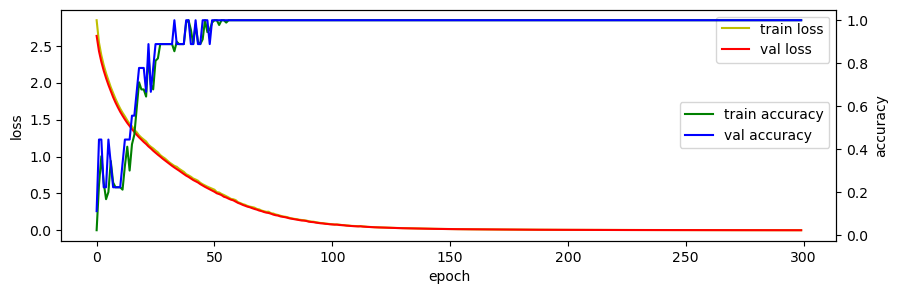

In [26]:
# 학습과정 중의 loss와 accuracy
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,3))
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
accuracy_ax = loss_ax.twinx()
accuracy_ax.plot(hist.history['accuracy'], 'g', label = 'train accuracy')
accuracy_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
accuracy_ax.set_ylabel('accuracy')
loss_ax.legend()
accuracy_ax.legend(loc = 'center right')
plt.show()

In [27]:
X_val, Y_val

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1.]], dtype=float32))

In [29]:
# 모델 평가하기
score = model.evaluate(X_val, Y_val, batch_size=3)

3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000


In [30]:
score

[0.001965433591976762, 1.0]

In [32]:
print('평가된 loss값 :', score[0])
print('평가된 accuracy :', score[1]*100,'%')

평가된 loss값 : 0.001965433591976762
평가된 accuracy : 100.0 %


# 7. 모델 사용하기(모델을 사용해서 예측하기)

In [42]:
H = model.predict(np.array([9]))
H

1/1 [==============================] - 0s 22ms/step


array([[1.9399289e-24, 5.9098031e-22, 0.0000000e+00, 3.9366666e-25,
        0.0000000e+00, 7.3879511e-26, 5.7186788e-29, 1.7110411e-24,
        2.1928725e-34, 2.1060139e-24, 2.7344681e-22, 1.4734110e-26,
        1.7991752e-20, 4.6366811e-20, 5.8882821e-10, 5.1343686e-15,
        1.7332047e-03, 4.6232974e-26, 9.9826682e-01]], dtype=float32)

In [47]:
model.predict(np.array([5])).argmax()

1/1 [==============================] - 0s 23ms/step


10

In [51]:
# 몇%의 확률로 분류되었는지
H[0, H.argmax()]

0.9982668

# 7. 모델 저장하기

In [52]:
model.save('model/2_deep_begin.h5')

# 저장된 모델 저장하기

In [3]:
from tensorflow.keras.models import load_model
model = load_model('model/2_deep_begin.h5')

In [7]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 45ms/step


4

In [16]:
H[0, H.argmax()]*100

99.8872458934784